## Data import

In [0]:
# IMPORTS AND PREPARATION
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, files
from oauth2client.client import GoogleCredentials
import pandas as pd

# Authenticate and create the PyDrive client.
def authenticate():
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    return GoogleDrive(gauth)

drive = authenticate()

    100% |████████████████████████████████| 993kB 21.4MB/s 


In [0]:
train_data_id = "1WC-_9W-bQc0-C8ecVRPMflzXuULerJtu"
downloaded = drive.CreateFile({'id': train_data_id})
downloaded.GetContentFile('train.csv')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_data = pd.read_csv("train.csv")

In [0]:
train_data['title'].sample(20)

57571     kecantikan wanita korea ada disini maybelline ...
144829    hot sale coty airspun loose face powder paling...
315123    bahan berkualitas trisen premium lace jenifer ...
230335                             diskon nyx bb cream nude
346592    ok dress midi wanita off shoulder sabrina leng...
375054    womens sexy v neck short sleeve lace stretch c...
543026         nokia 6 1 2018 64gb ram 4gb new bnib 100 ori
62895     giordani gold long wear mineral foundation spf...
606469    big sale sony xperia z5 32gb mulus original se...
214572                                purbasari face powder
401255     baju renda lengan panjang long sleeve lace dress
50760     harga special kak innisfree no sebum mineral p...
261536    sale soft matte lip cream mineral botanica no ...
477525    bigsize d90 kemeja vintage lengan panjang jumb...
422798    dto new kamisol wanita sexy tanpa lengan untuk...
506866                                       iphone 6s plus
587339            promo handphone samsun

In [0]:
import re
def clean_text(sentence):
  cleaned = sentence
  ## Remove numbers/words contain number
  cleaner = lambda x : re.sub('^\d|\.|-|_', '', x)
  #cleaned = re.sub('[^a-zA-Z ]', '', cleaned)
  words = cleaned.split()
  cleaned = ' '.join([cleaner(word) for word in words if len(word) > 1])
  return cleaned

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Text Preprocessing before prediction

In [0]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPool1D, Input, Activation, Reshape, Flatten, Dropout, CuDNNLSTM, Bidirectional, BatchNormalization, LSTM
from keras.optimizers import Adam, sgd
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
train_data.shape

(666615, 4)

In [0]:
text = train_data['title']
text = text.apply(clean_text)
y = train_data['Category']

In [0]:
text.shape

(666615,)

In [0]:
from sklearn.model_selection import train_test_split

### (Almost) all training items are used for validation
text_train, text_val, y_train, y_val = train_test_split(text, y, test_size=0.0, random_state = 1000)

In [0]:
print(text_train.shape)
print(text_val.shape)
print(y_val.shape)

(666615,)
(0,)
(0,)


In [0]:
tokenizer = Tokenizer()


In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train)

In [0]:
X_train_seq = tokenizer.texts_to_sequences(text_train)
X_val_seq = tokenizer.texts_to_sequences(text_val)

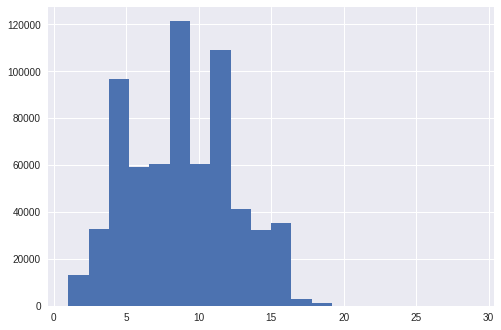

In [0]:
sentence_length = [len(x.split()) for x in text_train]
plt.hist(sentence_length, bins = 20)
plt.show()

In [0]:
max_length = 20
X_train = pad_sequences(X_train_seq, maxlen=max_length)
X_val = pad_sequences(X_val_seq, maxlen=max_length)

In [0]:
len(tokenizer.word_counts)

75538

In [0]:
X_val.shape

(0, 20)

In [0]:
X_train.shape

(666615, 20)

##model ensembling


In [0]:
!pwd

/content


In [0]:
%cd ./gdrive/My Drive/NDSC2019/submissions/combine-models

/content/gdrive/My Drive/NDSC2019/submissions/combine-models


In [0]:
googlenews_model = load_model('theBestGoogleNews.h5')

In [0]:
paragram_model = load_model('paragram_300_sl999-Model.h5')

In [0]:
glove_model = load_model('Copy of gloveModel.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
wiki_model = load_model('wiki-news-300d-1M-Model.h5')

In [0]:
hieu_model = load_model('Copy of text_model_0_75458.h5')

##Validation accuracy


In [0]:
text_train_a, text_val_a, y_train_a, y_val_a = train_test_split(text, y, test_size=0.9999, random_state = 1000)

In [0]:
tokenizer.fit_on_texts(text_train_a)

In [0]:
X_train_seq_a = tokenizer.texts_to_sequences(text_train_a)
X_val_seq_a = tokenizer.texts_to_sequences(text_val_a)

In [0]:
max_length = 20
X_train_a = pad_sequences(X_train_seq_a, maxlen=max_length)
X_val_a = pad_sequences(X_val_seq_a, maxlen=max_length)

In [0]:
print(X_val_a)

[[   0    0    0 ...  267  371    6]
 [   0    0    0 ...  252  109  119]
 [   0    0    0 ...   44 3671   89]
 ...
 [   0    0    0 ...   72    9  423]
 [   0    0    0 ...  979   69  198]
 [   0    0    0 ...   36  192  378]]


In [0]:
pred_googlenews_val_y = googlenews_model.predict([X_val_a], batch_size = 1024, verbose = 1)
pred_paragram_val_y = paragram_model.predict([X_val_a], batch_size = 1024, verbose = 1)
pred_wiki_val_y = wiki_model.predict([X_val_a], batch_size = 1024, verbose = 1)
pred_glove_val_y = glove_model.predict([X_val_a], batch_size = 1024, verbose = 1)
pred_hieu_val_y = hieu_model.predict([X_val_a], batch_size = 1024, verbose = 1)
pred_revised_hieu_val_y = revised_hieu_model.predict([X_val_a], batch_size = 1024, verbose = 1)

666549/666549 [==============================] - 42s 63us/step


In [0]:
pred_final_val_y = 0.75 * pred_hieu_val_y + 0.125 * pred_wiki_val_y + 0.125 * pred_paragram_val_y
val_prediction = np.argmax(pred_final_val_y, axis=1)
print(sklearn.metrics.accuracy_score(y_val_a, val_prediction))

0.7824466018252222


In [0]:
lst = []
for percent in range(700, 725, 1):
  print(percent)
  hieu_rate = percent/1000
  pred_final_val_y = hieu_rate * pred_hieu_val_y + (1-hieu_rate)/4*(pred_googlenews_val_y + pred_paragram_val_y + pred_wiki_val_y + pred_glove_val_y)
  val_prediction = np.argmax(pred_final_val_y, axis=1)
  #print(sklearn.metrics.accuracy_score(y_val_a, val_prediction))
  lst.append((hieu_rate, sklearn.metrics.accuracy_score(y_val_a, val_prediction)))

700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724


In [0]:
lst.sort(key = lambda x: x[1], reverse = True)

In [0]:
lst

[(0.711, 0.7825096129466851),
 (0.713, 0.7825066124170916),
 (0.712, 0.7825036118874982),
 (0.719, 0.782493110033921),
 (0.708, 0.7824916097691242),
 (0.709, 0.7824916097691242),
 (0.717, 0.7824916097691242),
 (0.72, 0.7824916097691242),
 (0.71, 0.7824886092395308),
 (0.714, 0.7824856087099373),
 (0.716, 0.7824796076507503),
 (0.715, 0.7824781073859536),
 (0.718, 0.7824781073859536),
 (0.707, 0.7824736065915634),
 (0.721, 0.7824721063267667),
 (0.706, 0.7824601042083927),
 (0.705, 0.782458603943596),
 (0.722, 0.7824526028844091),
 (0.7, 0.7824496023548156),
 (0.703, 0.7824496023548156),
 (0.701, 0.7824481020900189),
 (0.702, 0.7824466018252222),
 (0.704, 0.7824436012956287),
 (0.723, 0.782436099971645),
 (0.724, 0.782424097853271)]

Text(0, 0.5, 'validation accuracy on training data')

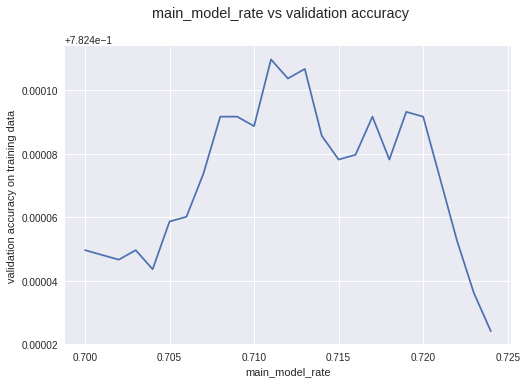

In [0]:
import matplotlib.pyplot as plt
x_values = [x[0] for x in lst]
y_values = [x[1] for x in lst]
plt.plot(x_values,y_values)
plt.suptitle('main_model_rate vs validation accuracy')
plt.xlabel('main_model_rate')
plt.ylabel('validation accuracy on training data')

In [0]:
'''
VALIDATION ACCURACY
100% pred_hieu_val_y: 0.7790485*** <--- main model
100% pred_googlenew_val_y: 0.6219962823438336
100% pred_paragram_val_y: 0.608841960606047
100% pred_wiki_val_y: 0.5961197151297204
100% pred_glove_val_y: 0.5921335115647912
1005 pred_revised_hieu_val_y: 0.7512996043801731

all the extra models have validation rate at 59-62%

0.9 * pred_hieu_val_y + 0.05 * pred_wiki_val_y + 0.05 * pred_paragram_val_: 0.7808053121375923
0.8 * pred_hieu_val_y + 0.1 * pred_wiki_val_y + 0.1 * pred_paragram_val_y: 0.7821120427755499******
0.7 * pred_hieu_val_y + 0.15 * pred_wiki_val_y + 0.15 * pred_paragram_val_y: 0.7823******
0.6 * pred_hieu_val_y + 0.2 * pred_wiki_val_y + 0.2 * pred_paragram_val_y: 0.7787
0.5 * pred_hieu_val_y + 0.25 * pred_wiki_val_y + 0.25 * pred_paragram_val_y: 0.7654
0.4 * pred_hieu_val_y + 0.3 * pred_wiki_val_y + 0.3 * pred_paragram_val_y: 0.7316

pred_hieu_val_y should be between 0.7 and 0.8
optimal:
0.711 + (1-0.711)/4 * {the other four predictions}: 0.7825096129466851, real result: ?
currBest:
100% pred_hieu_val_y: 0.7790485*** <--- main model, real result: 0.758
0.9 * pred_hieu_val_y + 0.05 * pred_wiki_val_y + 0.05 * pred_paragram_val_: 0.7808053121375923, real result: 0.76291 (+0.4%)
0.8 * pred_hieu_val_y + 0.1 * pred_wiki_val_y + 0.1 * pred_paragram_val_y: 0.7821120427755499******, real result: ?
'''

## Submission

In [0]:
%cd ../data

/content/gdrive/My Drive/NDSC2019/data


In [0]:
test_data = pd.read_csv('test.csv')

In [0]:
test_data.head()

,itemid,title,image_path
0,370855998,flormar 7 white cream bb spf 30 40ml,beauty_image/1588591395c5a254bab84042005f2a9f.jpg
1,637234604,maybelline clear smooth all in one bb cream sp...,beauty_image/920985ed9587ea20f58686ea74e20f93.jpg
2,690282890,murah innisfree eco natural green tea bb cream...,beauty_image/90b40e5710f54352b243fcfb0f5d1d7f.jpg
3,930913462,loreal white perfect day cream spf 17 pa white...,beauty_image/289c668ef3d70e1d929d602d52d5d78a.jpg
4,1039280071,hada labo cc cream ultimate anti aging spf 35 ...,beauty_image/d5b3e652c5822d2306f4560488ec30c6.jpg


In [0]:
test_text = test_data['title']
test_text = test_text.apply(clean_text)
X_test_seq = tokenizer.texts_to_sequences(test_text)
X_test = pad_sequences(X_test_seq, maxlen=20)

In [0]:
print(X_test)

[[   0    0    0 ...   51   35  190]
 [   0    0    0 ...    4   51  220]
 [   0    0    0 ... 2190   96 1351]
 ...
 [   0    0    0 ...  204  151 1377]
 [   0    0    0 ...   80  213  303]
 [   0    0    0 ...   43  180   42]]


In [0]:
pred_googlenews_test_y = googlenews_model.predict([X_test], batch_size = 1024, verbose = 1)

172402/172402 [==============================] - 14s 80us/step


In [0]:
pred_paragram_test_y = paragram_model.predict([X_test], batch_size = 1024, verbose = 1)

172402/172402 [==============================] - 11s 65us/step


In [0]:
pred_wiki_test_y = wiki_model.predict([X_test], batch_size = 1024, verbose = 1)

172402/172402 [==============================] - 12s 69us/step


In [0]:
pred_glove_test_y = glove_model.predict([X_test], batch_size = 1024, verbose = 1)

172402/172402 [==============================] - 12s 69us/step


In [0]:
glove

array([[1.59764953e-03, 1.60783473e-02, 5.70615630e-05, ...,
        6.84170711e-13, 3.76660855e-12, 2.62541703e-12],
       [3.98950800e-02, 5.47538847e-02, 9.76881459e-02, ...,
        6.48560428e-10, 2.00393870e-07, 1.56016611e-07],
       [6.60036551e-03, 3.93133126e-02, 6.58698409e-05, ...,
        4.37900150e-13, 7.31687660e-13, 4.12639194e-12],
       ...,
       [2.51868711e-04, 5.19986302e-02, 2.42538626e-05, ...,
        1.18527760e-14, 3.31469796e-13, 6.71153133e-11],
       [6.81196907e-05, 2.55697846e-01, 4.23826896e-05, ...,
        3.41797750e-14, 1.42058782e-12, 7.92943575e-12],
       [3.93279680e-12, 3.84058563e-09, 7.43333173e-12, ...,
        1.03108376e-10, 1.71641543e-04, 2.46819041e-11]], dtype=float32)

In [0]:
pred_glove_test_y

array([[1.59764953e-03, 1.60783473e-02, 5.70615630e-05, ...,
        6.84170711e-13, 3.76660855e-12, 2.62541703e-12],
       [3.98950800e-02, 5.47538847e-02, 9.76881459e-02, ...,
        6.48560428e-10, 2.00393870e-07, 1.56016611e-07],
       [6.60036551e-03, 3.93133126e-02, 6.58698409e-05, ...,
        4.37900150e-13, 7.31687660e-13, 4.12639194e-12],
       ...,
       [2.51868711e-04, 5.19986302e-02, 2.42538626e-05, ...,
        1.18527760e-14, 3.31469796e-13, 6.71153133e-11],
       [6.81196907e-05, 2.55697846e-01, 4.23826896e-05, ...,
        3.41797750e-14, 1.42058782e-12, 7.92943575e-12],
       [3.93279680e-12, 3.84058563e-09, 7.43333173e-12, ...,
        1.03108376e-10, 1.71641543e-04, 2.46819041e-11]], dtype=float32)

In [0]:
pred_hieu_test_y = hieu_model.predict([X_test], batch_size = 1024, verbose = 1)

172402/172402 [==============================] - 15s 85us/step


In [0]:
glove_pred = np.argmax(pred_glove_test_y, axis = 1)
glove_pred

array([ 4,  4,  4, ...,  5,  5, 34])

In [0]:
%cd ./gdrive/My Drive/NDSC2019/submissions/combine-models/predictionFiles

/content/gdrive/My Drive/NDSC2019/submissions/combine-models/predictionFiles


In [0]:
#load predictions from training in model submission file

In [0]:
glove_new_pred = np.load("gloveNew.npy")

In [0]:
hieu_pred = np.load("Hieu-model.npy")

In [0]:
para_pred = np.load("paragram.npy")

In [0]:
wiki_pred = np.load("wiki.npy")


In [0]:
glove = np.load("gloveNew.npy")

In [0]:
google_pred = np.load("googlePredict.npy")

In [0]:
from google.colab import files
files.download("gloveNew.npy")
files.download("google.npy")

In [0]:
pred_final_y = hieu_pred + (para_pred + wiki_pred + glove_new_pred + google_pred)

In [0]:
pred_final_y

array([[2.5391337e-03, 1.3569888e-01, 3.2251005e-04, ..., 6.8424113e-13,
        2.3312610e-10, 2.6268853e-12],
       [4.0173564e-02, 1.4338639e-01, 9.7700566e-02, ..., 6.4856043e-10,
        2.0039387e-07, 1.5601661e-07],
       [8.2746539e-03, 1.1716270e-01, 2.1712374e-04, ..., 4.3790023e-13,
        3.4177919e-12, 4.1263919e-12],
       ...,
       [2.5223583e-04, 5.2000396e-02, 2.4423749e-05, ..., 1.0448184e-03,
        2.2522230e-03, 2.3437100e-03],
       [6.8128174e-05, 2.5569820e-01, 4.2395022e-05, ..., 2.3011841e-04,
        7.4038113e-04, 5.0637489e-05],
       [5.7149157e-09, 4.1077882e-07, 7.0650379e-09, ..., 1.7297181e-07,
        1.5121870e-03, 6.2827735e-06]], dtype=float32)

In [0]:
y_pred = np.argmax(pred_final_y, axis=1)
y_pred

array([ 5,  5,  5, ..., 35, 33, 34])

In [0]:
test_data['Category'] = y_pred

In [0]:
submission[submission['Category2'] != submission['Category']].shape[0]

19577

In [0]:
pred_googlenews_test_y

array([[8.2575985e-05, 2.1846652e-02, 8.3071222e-07, ..., 2.2426481e-24,
        2.5207454e-17, 1.0082533e-23],
       [1.6300919e-04, 1.7026696e-02, 4.9590431e-06, ..., 2.0448441e-31,
        1.1722202e-21, 1.3920539e-32],
       [1.4876417e-05, 2.8290339e-03, 1.2644217e-08, ..., 5.8147695e-29,
        3.0808720e-20, 6.2905747e-29],
       ...,
       [7.3416591e-06, 9.3072106e-04, 7.5599637e-08, ..., 1.9527205e-07,
        7.7415700e-04, 4.8963931e-05],
       [8.8034729e-05, 9.2421542e-05, 4.9507966e-05, ..., 4.9347483e-04,
        5.8519629e-05, 2.8842095e-07],
       [2.5794071e-07, 9.2195745e-07, 5.7599348e-09, ..., 2.8435852e-06,
        8.5585879e-04, 2.5147881e-04]], dtype=float32)

In [0]:
google_pred

array([[8.2575985e-05, 2.1846652e-02, 8.3071222e-07, ..., 2.2426481e-24,
        2.5207454e-17, 1.0082533e-23],
       [1.6300919e-04, 1.7026696e-02, 4.9590431e-06, ..., 2.0448441e-31,
        1.1722202e-21, 1.3920539e-32],
       [1.4876417e-05, 2.8290339e-03, 1.2644217e-08, ..., 5.8147695e-29,
        3.0808720e-20, 6.2905747e-29],
       ...,
       [7.3416591e-06, 9.3072106e-04, 7.5599637e-08, ..., 1.9527205e-07,
        7.7415700e-04, 4.8963931e-05],
       [8.8034729e-05, 9.2421542e-05, 4.9507966e-05, ..., 4.9347483e-04,
        5.8519629e-05, 2.8842095e-07],
       [2.5794071e-07, 9.2195745e-07, 5.7599348e-09, ..., 2.8435852e-06,
        8.5585879e-04, 2.5147881e-04]], dtype=float32)

In [0]:
submission = test_data[['itemid', 'Category']]

In [0]:
submission['Category'] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
submission.to_csv("submission25.csv", index=False)

In [0]:
from google.colab import files
files.download('submission25.csv')

In [0]:
submission[submission['Category']!=submission['validate']].shape[0]

6419

In [0]:
submission

,itemid,Category,validate
0,370855998,5,5
1,637234604,5,5
2,690282890,5,5
3,930913462,4,4
4,1039280071,5,5
5,1327710392,3,3
6,1328802799,4,4
7,1330468145,5,5
8,1677309730,5,5
9,1683142205,5,5


In [0]:
submissionBenchmark['CategoryValid'] = google_pred


In [0]:
submission['validate'] = submissionBenchmark['Category']

NameError: ignored

In [0]:
submission[submission['validate']!=submission['Category']]

,itemid,Category,validate
69,1598121010,5,3
132,1004262161,3,9
155,1464431748,1,5
175,816212293,3,5
186,1646893023,3,5
204,1395623433,1,5
227,1486013685,4,5
304,79009684,3,5
350,1750887282,3,5
370,1590865124,3,5


In [0]:
to_submit = submission[['itemid','Category']]


In [0]:
to_submit['validate'] = submissionBenchmark['Category']

In [0]:
to_submit[to_submit['validate']!= to_submit['Category']].shape[0]

5146

In [0]:
to_submit.to_csv("submission25.csv", index=False)

NameError: ignored

In [0]:
from google.colab import files

In [0]:
files.download("submission25.csv")

FileNotFoundError: ignored

In [0]:
submission['Category2'] = submissionSubmitted['Category']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
submission2[submission2['Category']!=submission1['Category']].shape[0]

35204

In [0]:
submission1['Category2'] = submission2['Category']

In [0]:
submission1[submission1['Category']!=submission2['Category']].shape[0] #36342/172k different rows

35204

In [0]:
submission1[submission1['Category']!=submission2['Category']]

,itemid,Category,Category2
7,1330468145,5,3
10,1704308849,3,5
17,580992667,9,3
29,1830918439,3,9
34,1061653323,5,4
47,1741774119,1,7
48,1748110969,5,3
52,1828738499,5,3
58,941146444,5,1
64,1474097150,4,9
